Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 8)          

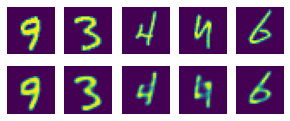

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 시드 지정
tf.random.set_seed(2)
np.random.seed(2)

# MNIST 데이터셋 불러오기기
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 생성자 모델
autoencoder = Sequential()

# 인코딩
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))                       
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

# 전체 구조 확인
autoencoder.summary()

# 컴파일 및 학습
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# 학습된 결과를 출력
random_test = np.random.randint(X_test.shape[0], size=5)

# 테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(X_test) # 앞선 autoencoder 모델에 넣어주기


plt.figure(figsize=(7,2)) # 출력 이미지의 크기

for i, image_idx in enumerate(random_test):
    # 랜덤으로 뽑은 이미지를 차례로 나열
    ax = plt.subplot(2, 7, i+1)
    # 테스트할 이미지 출력
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7+i+1)
    # 오토인코딩 결과를 다음 열에 입력
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis('off')
plt.show()
